# Лабораторная работа №2

## Лыскова В.Э. М19-ТС

### Вариант №1

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1. Определите количество мужчин и женщин, которые ехали на корабле.

In [3]:
total = df.shape[0]
male = df[df.Sex == "male"].shape[0]
female = df[df.Sex == "female"].shape[0]
print("Total =", total, ", male =", male, ", female =", female)

Total = 891 , male = 577 , female = 314


### 2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров.


In [4]:
survived = df[df.Survived == 1].shape[0]
ratio = survived / total
print("Survived ratio = %.2f" % ratio)

Survived ratio = 0.38


### 3. Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [5]:
first_class = df[df.Pclass == 1].shape[0]
first_class_ratio = first_class / total
print("First class ratio = %.2f" % first_class_ratio)

First class ratio = 0.24


### 4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 

In [6]:
df [['Age']].head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [7]:
mean = df.Age.mean()
median = df.Age.median()
print("Age mean = %.1f" % mean, ", age median = %.1f" % median)

Age mean = 29.7 , age median = 28.0


### 5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Постройте плотность распределения признаков SibSp и Parch.

In [15]:
sibSp = df.SibSp
parch = df.Parch
corr = sibSp.corr(parch, method="pearson")
print("Correlation = %.2f" % corr)

Correlation = 0.41


<AxesSubplot:ylabel='Density'>

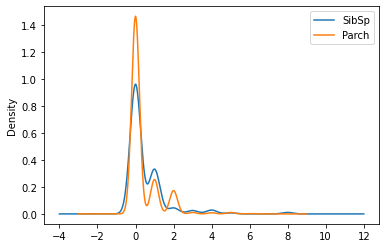

In [9]:
sibSp.plot.kde(legend=True)
parch.plot.kde(legend=True)

### 6.Какое самое популярное женское имя на корабле? 


In [10]:
def getFirstFemaleName(fullName):
    splitted = fullName.split('.')
    abbr = splitted[0].split(' ')[-1]
    if abbr in ["Mrs", "Miss", "Lady", "Mme", "Ms", "Mlle"]:
        firstName = splitted[1].split()[0]
        firstName = firstName.replace("(", "")
        firstName = firstName.replace(")", "")
        return firstName
    if abbr == "Countess":
        return "Lucy"
    else:
        return None

names = df.Name
femaleNames = names.apply(getFirstFemaleName)
noNoneFemaleNames = femaleNames.dropna()
noNoneFemaleNames.value_counts().head()

William      13
Mary         11
Anna          9
Elizabeth     8
Margaret      6
Name: Name, dtype: int64

### 7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [11]:
pClass = df.Pclass
survived = df.Survived

corr = survived.corr(pClass, method="pearson")
print("Correlation = %.2f" % corr)

Correlation = -0.34


### 8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

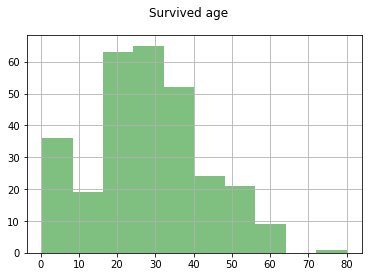

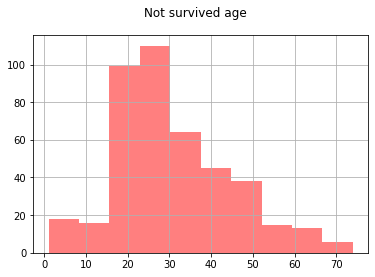

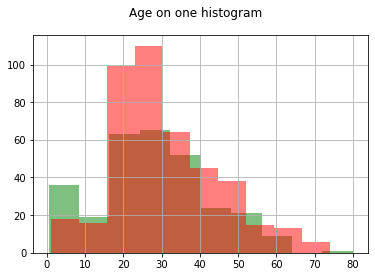

In [16]:
import matplotlib.pyplot as plt
import pylab as pl
survivedPeople = df[df.Survived == 1]["Age"]
notSurvivedPeople = df[df.Survived == 0]["Age"]

binsNumber = 10
plt.figure();
pl.suptitle("Survived age")
survivedPeople.hist(bins=binsNumber, alpha=0.5, color="g")
plt.figure();
pl.suptitle("Not survived age")
notSurvivedPeople.hist(bins=binsNumber, alpha=0.5, color="r")

plt.figure();
pl.suptitle("Age on one histogram")
survivedPeople.hist(bins=binsNumber, alpha=0.5, color="g")
notSurvivedPeople.hist(bins=binsNumber, alpha=0.5, color="r")
plt.show()

#### По графикам можно сделать следующие выводы:
- Наибольшее колличество выживших пассажиров в возрасте от 20 до 30 лет;
- Наибольшее колличество не выживших пассажиров в возрасте от 25 до 30 лет

### 9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

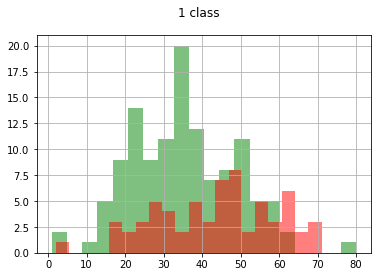

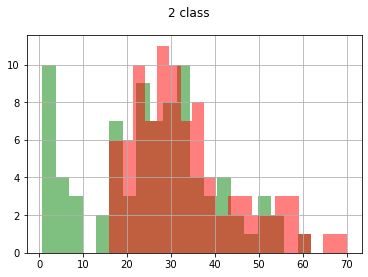

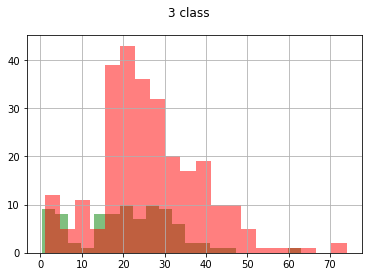

In [13]:
survivedPeople1class = df[(df.Survived == 1) & (df.Pclass == 1)]["Age"]
survivedPeople2class = df[(df.Survived == 1) & (df.Pclass == 2)]["Age"]
survivedPeople3class = df[(df.Survived == 1) & (df.Pclass == 3)]["Age"]
notSurvivedPeople1class = df[(df.Survived == 0) & (df.Pclass == 1)]["Age"]
notSurvivedPeople2class = df[(df.Survived == 0) & (df.Pclass == 2)]["Age"]
notSurvivedPeople3class = df[(df.Survived == 0) & (df.Pclass == 3)]["Age"]

binsNumber = 20

plt.figure();
pl.suptitle("1 class")
survivedPeople1class.hist(bins=binsNumber, alpha=0.5, color="g")
notSurvivedPeople1class.hist(bins=binsNumber, alpha=0.5, color="r")

plt.figure();
pl.suptitle("2 class")
survivedPeople2class.hist(bins=binsNumber, alpha=0.5, color="g")
notSurvivedPeople2class.hist(bins=binsNumber, alpha=0.5, color="r")

plt.figure();
pl.suptitle("3 class")
survivedPeople3class.hist(bins=binsNumber, alpha=0.5, color="g")
notSurvivedPeople3class.hist(bins=binsNumber, alpha=0.5, color="r")
plt.show()

#### По графикам можно сделать следующие выводы:
- Наибольшее количество людей выжило в первом классе;
- Число выживших пассажиров второго класса составляет около 50%.Все пассажиры второго класса в возрасте до 15 лет выжили.;
- Наибольшее количество людей погибло в третьем классе

### 10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.
### Считаем, что ребенок -- это человек, возраст которого меньше 18 лет

<BarContainer object of 3 artists>

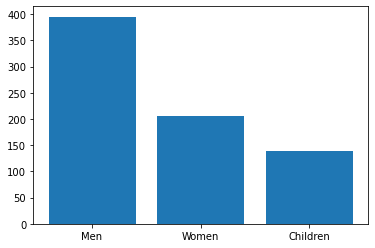

In [14]:
men = df[(df.Sex == "male") & (df.Age >= 18)]
women = df[(df.Sex == "female") & (df.Age >= 18)]
children = df[df.Age <= 18]

menNumber = men.shape[0]
womenNumber = women.shape[0]
childrenNumber = children.shape[0]

plt.bar(["Men", "Women", "Children"], [menNumber, womenNumber, childrenNumber])